In [334]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.model_selection as model_selection

In [335]:
#  advertising.scv dataset
data_advertising = pd.read_csv("data/advertising.csv")
data_advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [336]:
data_advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [337]:
# Initialization of variables (X, Y) : X=TV and Y=Sales
X = data_advertising['TV'].values
Y = data_advertising['Sales'].values

In [338]:
# Pourquoi il s’agit d’un probleme de regression
# 1. On a des valeurs continues
# 2. On cherche à prédire une valeur continue   (Sales)

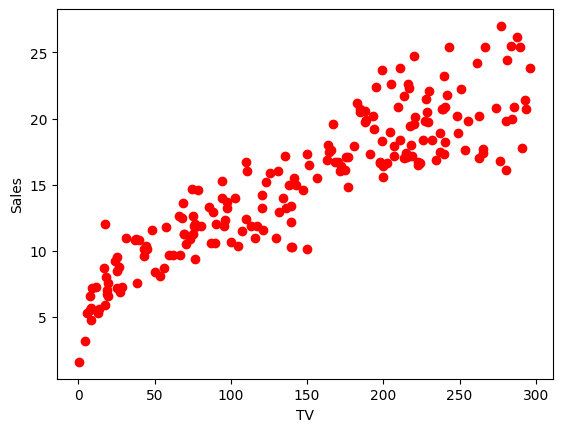

In [339]:
# Visualiser la base de donn ́ees avec matplotlib.
plt.scatter(X,Y, c="r")
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()
# On remarque que les données sont linéairement corrélées

In [340]:
# (80% pour la base d’apprentissage et 20% pour la base de test )
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2)

In [341]:
# Definir une fonction MSE(X,y,W) qui retourne la moyenne des erreurs entre la valeur theorique et la valeur reelle.
def MSE(X, y, W):
    return np.mean((y - X.dot(W)) ** 2)

# La MSE est une fonction de coût qui permet de mesurer la qualité d'un modèle de régression.
# Elle est définie comme la moyenne des carrés des erreurs de prédiction.
# Elle permet de mesurer la distance entre les valeurs prédites et les valeurs réelles.

In [342]:
# Definir la fonction Gradient(X,y,W).
def Gradient(X, y, W):
    return -2 * X.T.dot(y - X.dot(W)) / len(y)

In [343]:
# Etablir une fonction de mise `a jour des param`etres W MiseJour(grad,W,alpha).
def MiseJour(grad, W, alpha):
    return W - alpha * grad

In [344]:
# Ecrire la fonction Batch Gradient Descent(X,y,W,N max,alpha,eps)

def Batch_Gradient_Descent(X, y, W, N_max, alpha, eps):
    MSE_list = []
    for i in range(N_max):
        grad = Gradient(X, y, W)
        W = MiseJour(grad, W, alpha)
        mse = MSE(X, y, W)
        MSE_list.append(mse)
        if np.linalg.norm(grad) < eps or np.isnan(mse):
            print("Optimization terminated due to NaN or small gradient.")
            break
        print(f"Iteration {i+1}, MSE: {mse}")
    return W, MSE_list

In [345]:
X_train = X_train.reshape(-1, 1)
W = np.zeros(X_train.shape[1])
W, MSE_list = Batch_Gradient_Descent(X_train, Y_train, W, 10, 0.01, 0.0001)

Iteration 1, MSE: 82896624.62259917
Iteration 2, MSE: 29075664461987.96
Iteration 3, MSE: 1.0198176915115373e+19
Iteration 4, MSE: 3.576971130892747e+24
Iteration 5, MSE: 1.2546087970170681e+30
Iteration 6, MSE: 4.400491857365821e+35
Iteration 7, MSE: 1.5434555084248678e+41
Iteration 8, MSE: 5.413610531967006e+46
Iteration 9, MSE: 1.898802967228563e+52
Iteration 10, MSE: 6.659978007405665e+57


Final weights: [-4.73845571e+26]


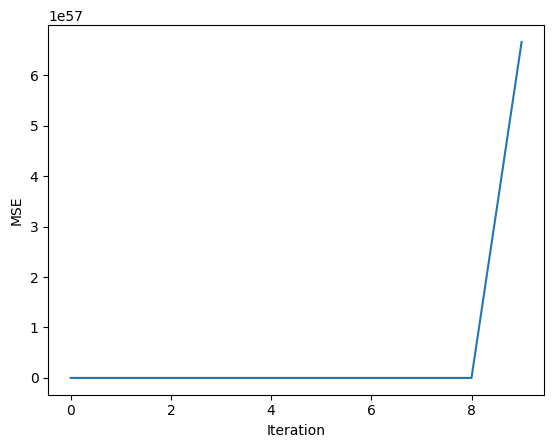

In [346]:
# Tracer l’MSE
print("Final weights:", W)
plt.plot(MSE_list)
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()

In [347]:
# Donner l’erreur de ce modele.
X_test = X_test.reshape(-1, 1)
print("MSE on test set:", MSE(X_test, Y_test, W))

MSE on test set: 5.8670290556444904e+57
